In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 16})
sns.set_style("whitegrid")

In [206]:
df = pd.read_csv('../data/NASA-asteroid-classification.csv')

In [207]:
df.head()

,full_name,name,neo,pha,epoch_cal,equinox,e,a,q,i,...,moid,t_jup,om,per,per_y,class,producer,first_obs,last_obs,diameter
0,433 Eros (1898 DQ),Eros,Y,N,20200531.0,J2000,0.222951,1.458046,1.132973,10.830543,...,0.148623,4.582,304.299327,643.065402,1.760617,AMO,Giorgini,1893-10-29,2019-02-13,16.840
1,588 Achilles (1906 TG),Achilles,N,N,20200531.0,J2000,0.147122,5.209394,4.442980,10.319724,...,3.470060,2.946,316.536049,4342.893776,11.890195,TJN,Otto Matic,1906-02-22,2020-01-06,130.099
2,617 Patroclus (1906 VY),Patroclus,N,N,20200531.0,J2000,0.138967,5.214560,4.489910,22.051776,...,3.537570,2.836,44.348414,4349.355185,11.907886,TJN,Ryan S. Park,1998-04-22,2019-08-17,140.362
3,624 Hektor (1907 XM),Hektor,N,N,20200531.0,J2000,0.022797,5.262260,5.142298,18.157697,...,4.149850,2.899,342.791035,4409.170054,12.071650,TJN,Otto Matic,1907-02-11,2020-01-26,225.000
4,659 Nestor (1908 CS),Nestor,N,N,20200531.0,J2000,0.117448,5.164464,4.557910,4.522630,...,3.548340,2.980,350.739111,4286.830857,11.736703,TJN,Otto Matic,1908-03-23,2020-01-06,112.320


In [208]:
df.shape

(7856, 25)

In [209]:
# Check if there are null values
df.isnull().sum()

full_name       0
name         7442
neo             0
pha             0
epoch_cal       0
equinox         0
e               0
a               0
q               0
i               0
w               0
H               0
ma              0
ad              0
n               0
moid            0
t_jup           0
om              0
per             0
per_y           0
class           0
producer        0
first_obs       0
last_obs        0
diameter     5442
dtype: int64

In [210]:
df.columns

Index(['full_name', 'name', 'neo', 'pha', 'epoch_cal', 'equinox', 'e', 'a',
       'q', 'i', 'w', 'H', 'ma', 'ad', 'n', 'moid', 't_jup', 'om', 'per',
       'per_y', 'class', 'producer', 'first_obs', 'last_obs', 'diameter'],
      dtype='object')

In [211]:
# Create column name dictionary to rename columns
column_names = {
    'pha': 'hazardous',
    'e': 'eccentricity_(e)',
    'a': 'semi_major_axis_(a)',
    'q': 'perihelion_dist_(q)',
    'i': 'inclination_(i)',
    'w': 'perihelion_arg_(w)',
    'H': 'abs_magnitude_(H)',
    'ma': 'mean_anomaly',
    'ad': 'aphelion_dist_(Q)',
    'n': 'mean_motion_(n)',
    'moid': 'min_orbit_intersection_dist',
    't_jup': 't_jupiter',
    'per': 'orbital_per_(d)',
    'per_y': 'orbital_per_(y)',
    'om': 'asc_node_long_(deg)',
    'diameter': 'diameter_(km)'
}

# Rename columns
df.rename(columns=column_names, inplace=True)

In [212]:
# Drop name column because it's a repitition of full_name column but with most values missing
# Drop producer because it's unbalanced and won't contribute to the model 
# Drop equinox because all observations have the same equinox 'J2000'
df.drop(columns=['name', 'producer', 'equinox'], inplace=True)

# Verify there are no more missing values
df.isnull().sum()

full_name                         0
neo                               0
hazardous                         0
epoch_cal                         0
eccentricity_(e)                  0
semi_major_axis_(a)               0
perihelion_dist_(q)               0
inclination_(i)                   0
perihelion_arg_(w)                0
abs_magnitude_(H)                 0
mean_anomaly                      0
aphelion_dist_(Q)                 0
mean_motion_(n)                   0
min_orbit_intersection_dist       0
t_jupiter                         0
asc_node_long_(deg)               0
orbital_per_(d)                   0
orbital_per_(y)                   0
class                             0
first_obs                         0
last_obs                          0
diameter_(km)                  5442
dtype: int64

In [213]:
# Inspect the data types
df.dtypes

full_name                       object
neo                             object
hazardous                       object
epoch_cal                      float64
eccentricity_(e)               float64
semi_major_axis_(a)            float64
perihelion_dist_(q)            float64
inclination_(i)                float64
perihelion_arg_(w)             float64
abs_magnitude_(H)              float64
mean_anomaly                   float64
aphelion_dist_(Q)              float64
mean_motion_(n)                float64
min_orbit_intersection_dist    float64
t_jupiter                      float64
asc_node_long_(deg)            float64
orbital_per_(d)                float64
orbital_per_(y)                float64
class                           object
first_obs                       object
last_obs                        object
diameter_(km)                  float64
dtype: object

In [214]:
df.head()

,full_name,neo,hazardous,epoch_cal,eccentricity_(e),semi_major_axis_(a),perihelion_dist_(q),inclination_(i),perihelion_arg_(w),abs_magnitude_(H),...,mean_motion_(n),min_orbit_intersection_dist,t_jupiter,asc_node_long_(deg),orbital_per_(d),orbital_per_(y),class,first_obs,last_obs,diameter_(km)
0,433 Eros (1898 DQ),Y,N,20200531.0,0.222951,1.458046,1.132973,10.830543,178.882294,10.4,...,0.559819,0.148623,4.582,304.299327,643.065402,1.760617,AMO,1893-10-29,2019-02-13,16.840
1,588 Achilles (1906 TG),N,N,20200531.0,0.147122,5.209394,4.442980,10.319724,133.308510,8.3,...,0.082894,3.470060,2.946,316.536049,4342.893776,11.890195,TJN,1906-02-22,2020-01-06,130.099
2,617 Patroclus (1906 VY),N,N,20200531.0,0.138967,5.214560,4.489910,22.051776,307.866082,8.2,...,0.082771,3.537570,2.836,44.348414,4349.355185,11.907886,TJN,1998-04-22,2019-08-17,140.362
3,624 Hektor (1907 XM),N,N,20200531.0,0.022797,5.262260,5.142298,18.157697,184.243883,7.2,...,0.081648,4.149850,2.899,342.791035,4409.170054,12.071650,TJN,1907-02-11,2020-01-26,225.000
4,659 Nestor (1908 CS),N,N,20200531.0,0.117448,5.164464,4.557910,4.522630,343.462149,8.7,...,0.083978,3.548340,2.980,350.739111,4286.830857,11.736703,TJN,1908-03-23,2020-01-06,112.320


In [215]:
# Convert datetime columns to pandas datetime data types 
df['first_obs'] = pd.to_datetime(df['first_obs'])
df['last_obs'] = pd.to_datetime(df['last_obs'])

# Check that it worked
df.dtypes

full_name                              object
neo                                    object
hazardous                              object
epoch_cal                             float64
eccentricity_(e)                      float64
semi_major_axis_(a)                   float64
perihelion_dist_(q)                   float64
inclination_(i)                       float64
perihelion_arg_(w)                    float64
abs_magnitude_(H)                     float64
mean_anomaly                          float64
aphelion_dist_(Q)                     float64
mean_motion_(n)                       float64
min_orbit_intersection_dist           float64
t_jupiter                             float64
asc_node_long_(deg)                   float64
orbital_per_(d)                       float64
orbital_per_(y)                       float64
class                                  object
first_obs                      datetime64[ns]
last_obs                       datetime64[ns]
diameter_(km)                     

In [216]:
# Assign target labels (hazardous)
# Assign NEO labels
df['hazardous'] = df['hazardous'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})

df['hazardous'].value_counts()

0    7093
1     763
Name: hazardous, dtype: int64

In [217]:
df['neo'].value_counts()

0    4945
1    2911
Name: neo, dtype: int64

In [218]:
df.dtypes

full_name                              object
neo                                     int64
hazardous                               int64
epoch_cal                             float64
eccentricity_(e)                      float64
semi_major_axis_(a)                   float64
perihelion_dist_(q)                   float64
inclination_(i)                       float64
perihelion_arg_(w)                    float64
abs_magnitude_(H)                     float64
mean_anomaly                          float64
aphelion_dist_(Q)                     float64
mean_motion_(n)                       float64
min_orbit_intersection_dist           float64
t_jupiter                             float64
asc_node_long_(deg)                   float64
orbital_per_(d)                       float64
orbital_per_(y)                       float64
class                                  object
first_obs                      datetime64[ns]
last_obs                       datetime64[ns]
diameter_(km)                     

In [219]:
df['class'].value_counts()

TJN    4945
APO    1473
AMO    1201
ATE     237
Name: class, dtype: int64

In [220]:
# get dummies for each asteroid class
# AMO was dropped
# df = pd.get_dummies(df, columns=['class'], drop_first=True)

In [221]:
df.head()

,full_name,neo,hazardous,epoch_cal,eccentricity_(e),semi_major_axis_(a),perihelion_dist_(q),inclination_(i),perihelion_arg_(w),abs_magnitude_(H),...,mean_motion_(n),min_orbit_intersection_dist,t_jupiter,asc_node_long_(deg),orbital_per_(d),orbital_per_(y),class,first_obs,last_obs,diameter_(km)
0,433 Eros (1898 DQ),1,0,20200531.0,0.222951,1.458046,1.132973,10.830543,178.882294,10.4,...,0.559819,0.148623,4.582,304.299327,643.065402,1.760617,AMO,1893-10-29,2019-02-13,16.840
1,588 Achilles (1906 TG),0,0,20200531.0,0.147122,5.209394,4.442980,10.319724,133.308510,8.3,...,0.082894,3.470060,2.946,316.536049,4342.893776,11.890195,TJN,1906-02-22,2020-01-06,130.099
2,617 Patroclus (1906 VY),0,0,20200531.0,0.138967,5.214560,4.489910,22.051776,307.866082,8.2,...,0.082771,3.537570,2.836,44.348414,4349.355185,11.907886,TJN,1998-04-22,2019-08-17,140.362
3,624 Hektor (1907 XM),0,0,20200531.0,0.022797,5.262260,5.142298,18.157697,184.243883,7.2,...,0.081648,4.149850,2.899,342.791035,4409.170054,12.071650,TJN,1907-02-11,2020-01-26,225.000
4,659 Nestor (1908 CS),0,0,20200531.0,0.117448,5.164464,4.557910,4.522630,343.462149,8.7,...,0.083978,3.548340,2.980,350.739111,4286.830857,11.736703,TJN,1908-03-23,2020-01-06,112.320


In [222]:
cols = list(df.columns)

[Astronomical Unit](https://cneos.jpl.nasa.gov/glossary/au.html)  
[Lunar Distance](https://cneos.jpl.nasa.gov/glossary/LD.html)  
[True Anomoly](https://cneos.jpl.nasa.gov/glossary/true_anomaly.html)  
[Perihelion](https://cneos.jpl.nasa.gov/glossary/perihelion.html)  
[Absolute Magnitude](https://cneos.jpl.nasa.gov/glossary/h.html)
[Jupiter Tisserand Invariant](https://pdssbn.astro.umd.edu/about/what_r_sb.shtml)  
[Tisserand Parameter](http://www2.ess.ucla.edu/~jewitt/tisserand.html)

>\begin{equation}
T_J = \frac{a_J}{a} + 2 \left[(1 - e^2)\frac{a}{a_J}\right]^{1/2} \cos(i)
\end{equation}  

[Mean Anomaly](http://www.columbia.edu/~my2317/asteroidproject.html)
[Epoch](https://en.wikipedia.org/wiki/Epoch_(astronomy))

https://cneos.jpl.nasa.gov/sentry/intro.html  
https://pdssbn.astro.umd.edu/about/what_r_sb.shtml

In [223]:
cols

['full_name',
 'neo',
 'hazardous',
 'epoch_cal',
 'eccentricity_(e)',
 'semi_major_axis_(a)',
 'perihelion_dist_(q)',
 'inclination_(i)',
 'perihelion_arg_(w)',
 'abs_magnitude_(H)',
 'mean_anomaly',
 'aphelion_dist_(Q)',
 'mean_motion_(n)',
 'min_orbit_intersection_dist',
 't_jupiter',
 'asc_node_long_(deg)',
 'orbital_per_(d)',
 'orbital_per_(y)',
 'class',
 'first_obs',
 'last_obs',
 'diameter_(km)']

In [224]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10), dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ['#7F7FFF', '#7F7FFF', '#7F7FFF', '#7F7FFF']
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=f'{title} Histogram')
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)
    
#     '#7F7FFF', '#FCBFB8', '#7F7FFF', '#FCBFB8'

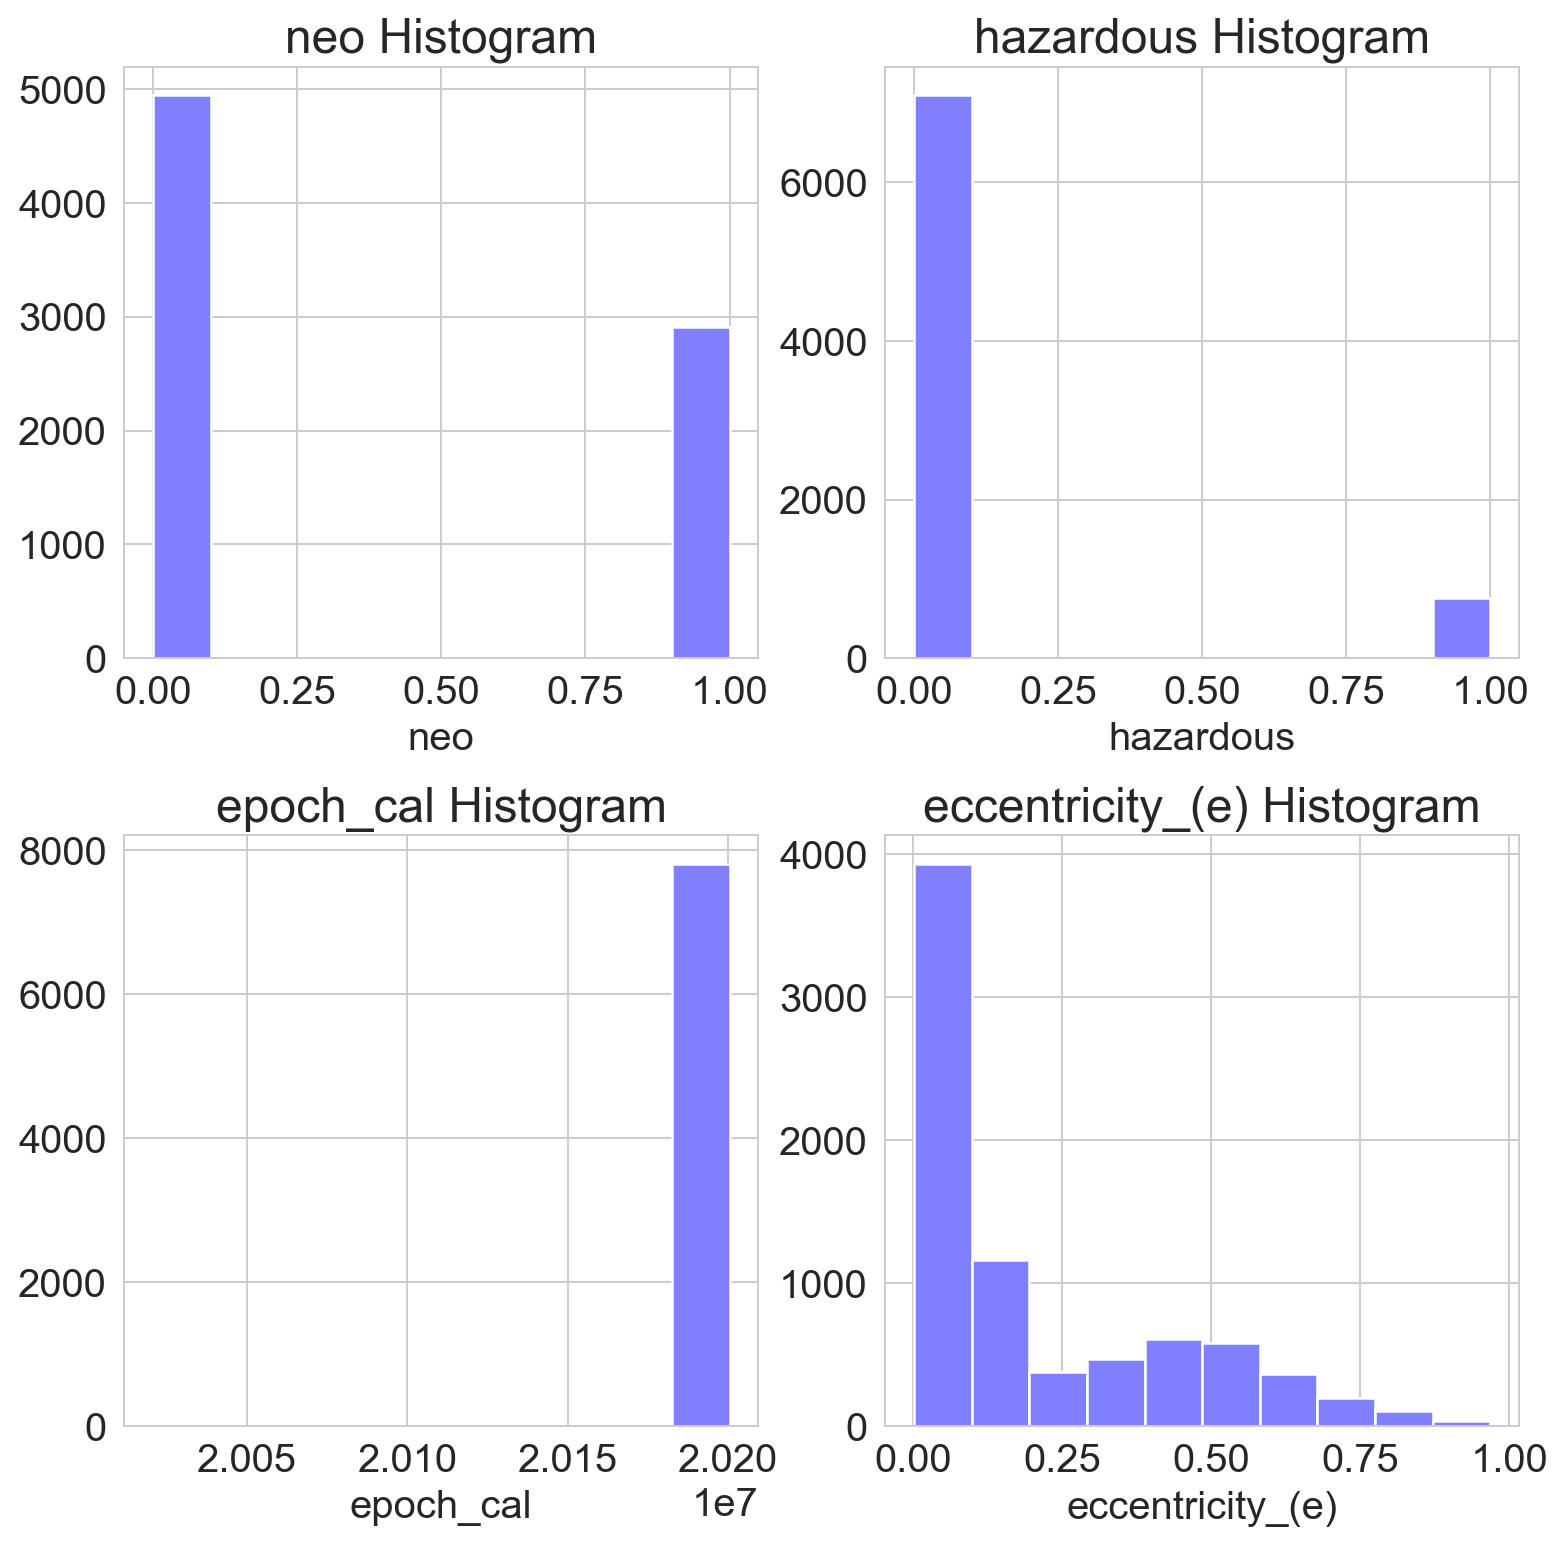

In [225]:
subplot_histograms(df,
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)'],
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)'],
                   ['neo', 'hazardous', 'epoch_cal', 'eccentricity_(e)']
                  )

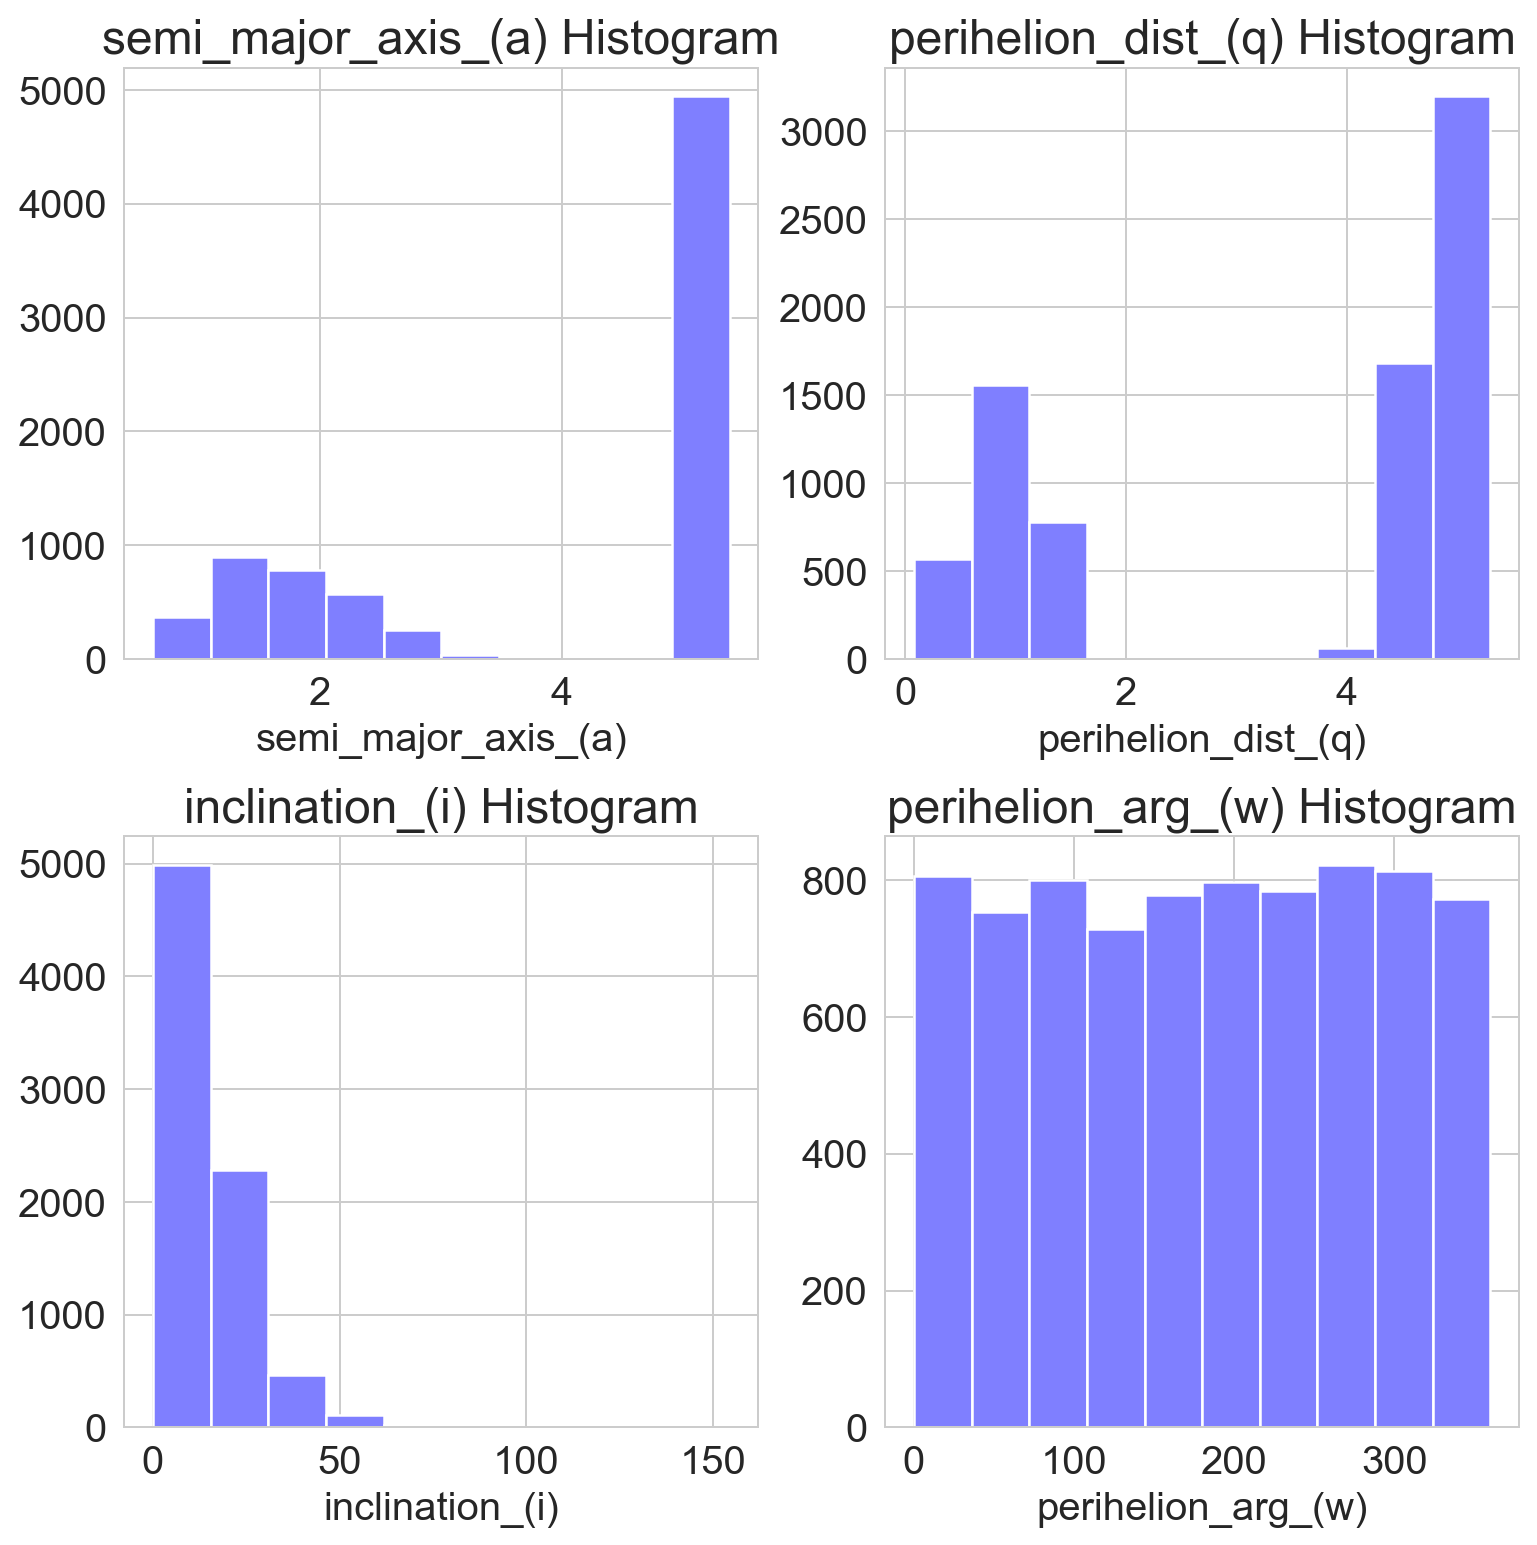

In [226]:
subplot_histograms(df,
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)'],
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)'],
                   ['semi_major_axis_(a)', 'perihelion_dist_(q)', 'inclination_(i)', 'perihelion_arg_(w)']
                  )

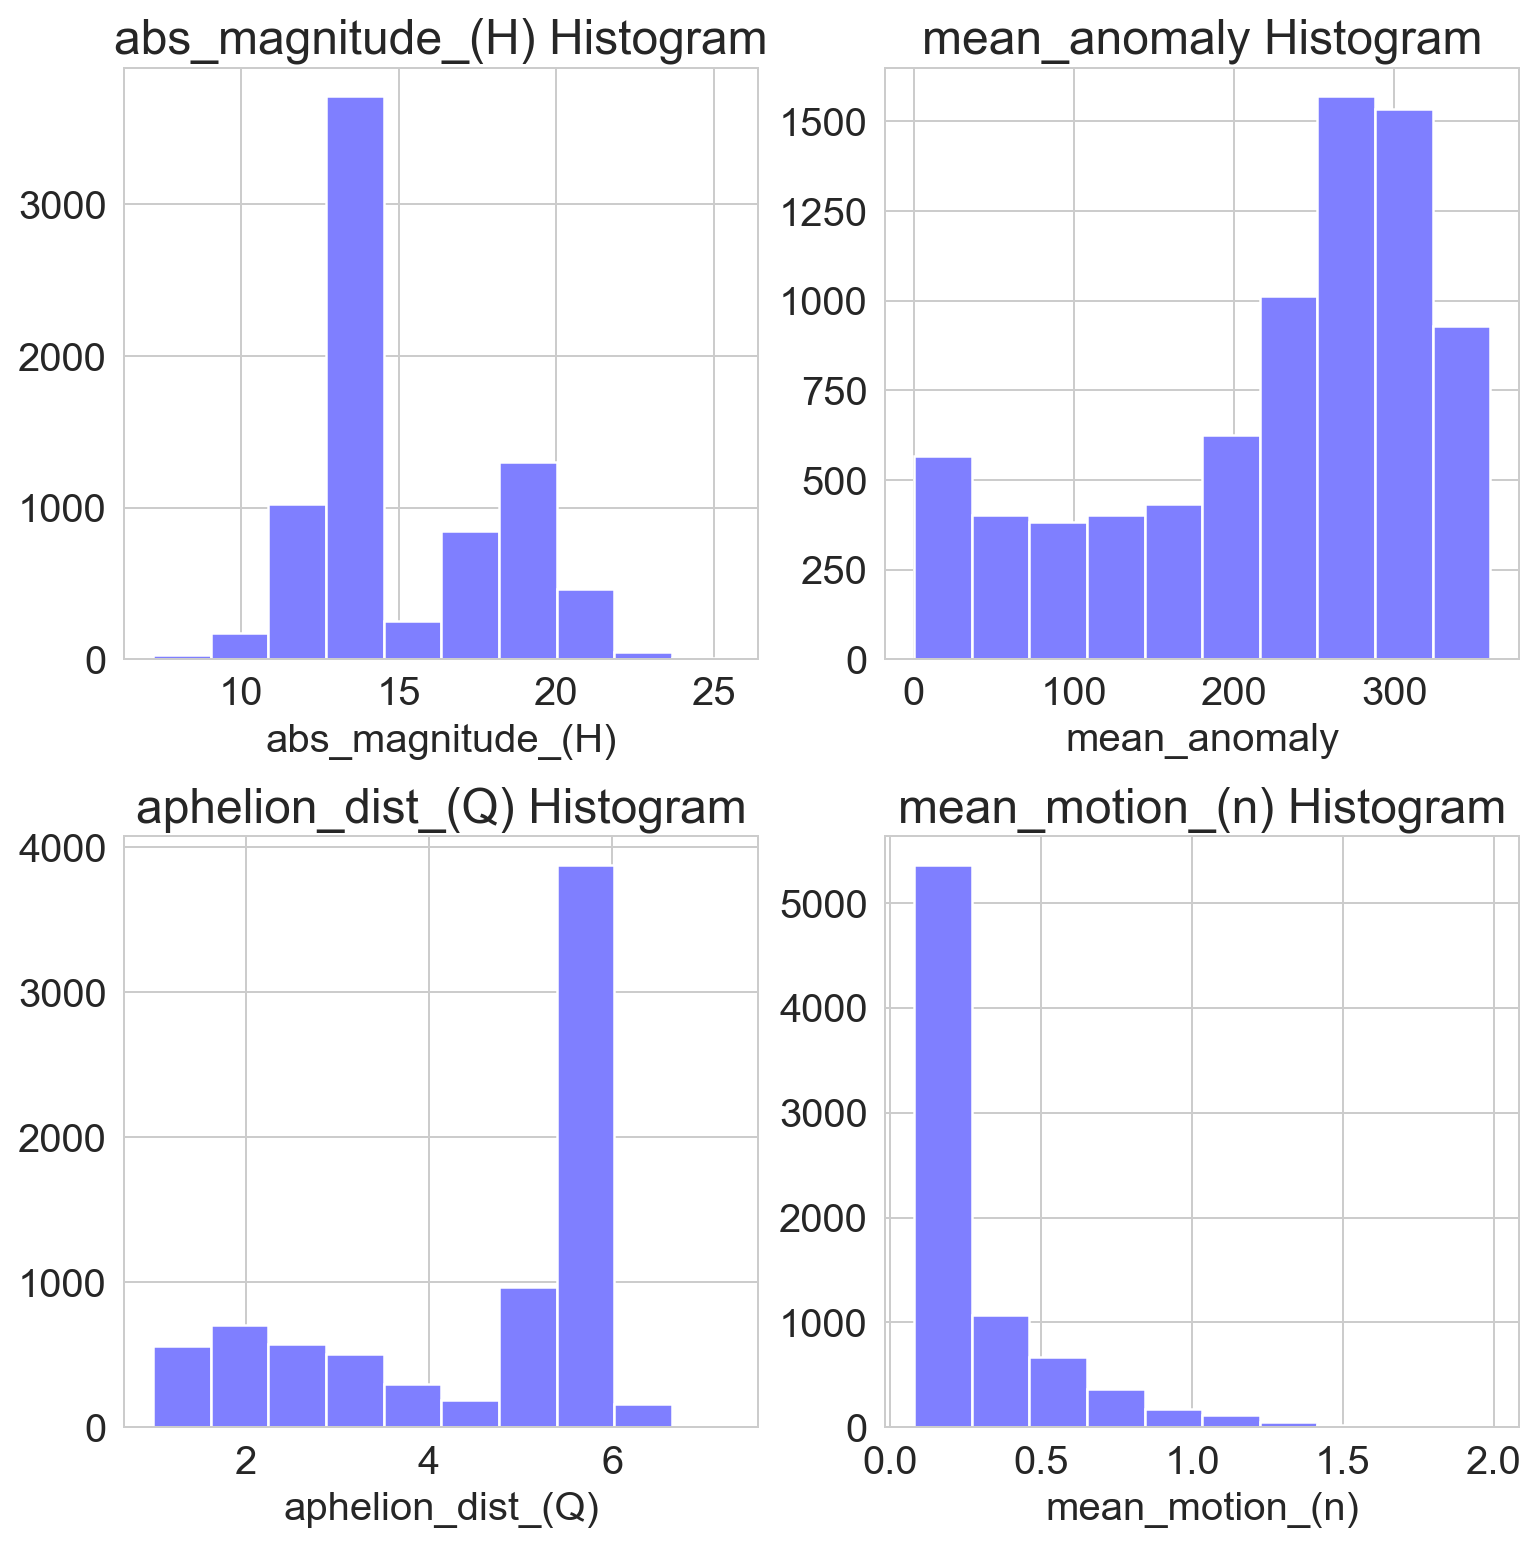

In [227]:
subplot_histograms(df,
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)'],
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)'],
                  ['abs_magnitude_(H)', 'mean_anomaly', 'aphelion_dist_(Q)', 'mean_motion_(n)']
                  )

/Users/mariaflores/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mariaflores/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


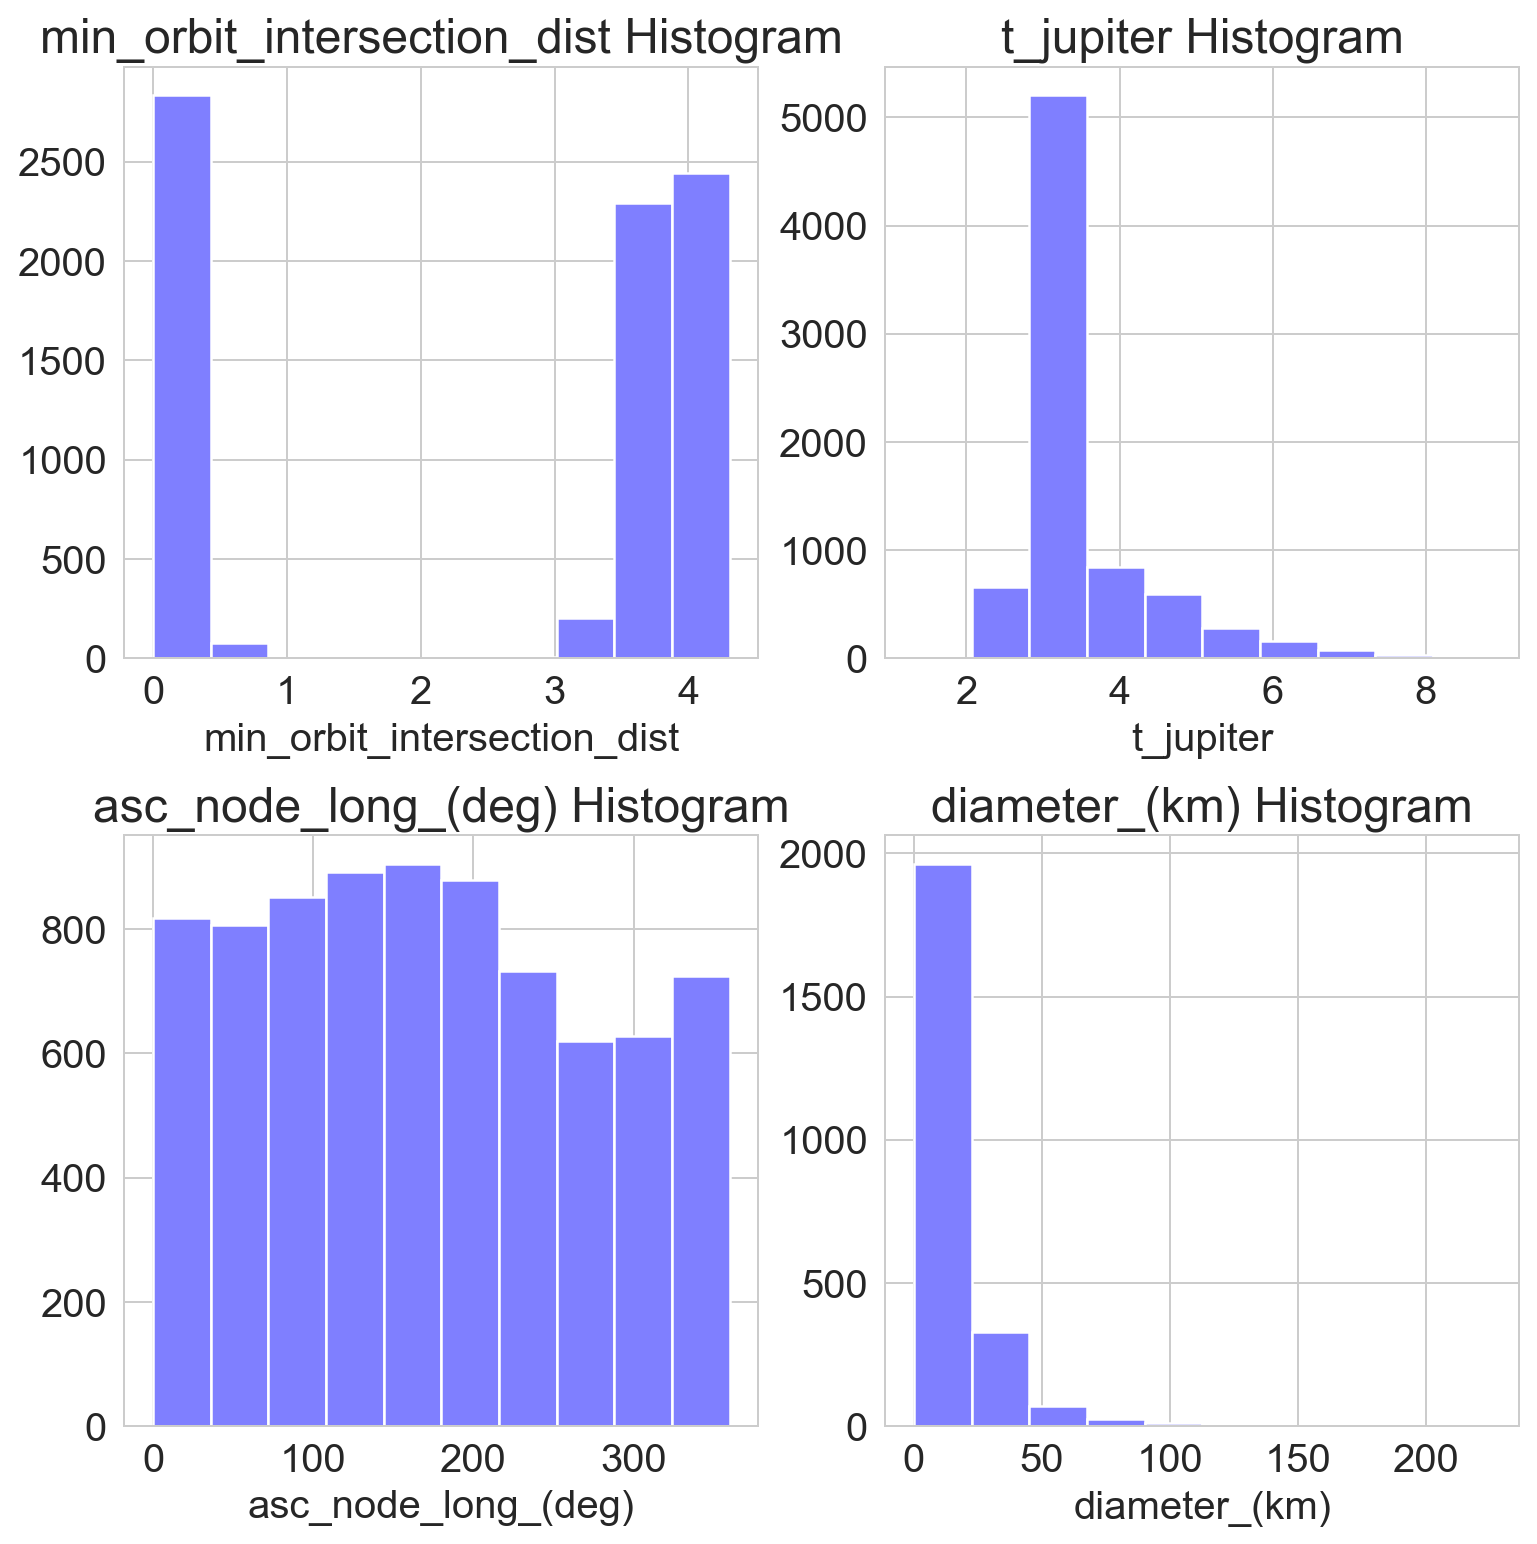

In [228]:
subplot_histograms(df,
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'diameter_(km)'],
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'diameter_(km)'],
                  ['min_orbit_intersection_dist', 't_jupiter', 'asc_node_long_(deg)', 'diameter_(km)'])

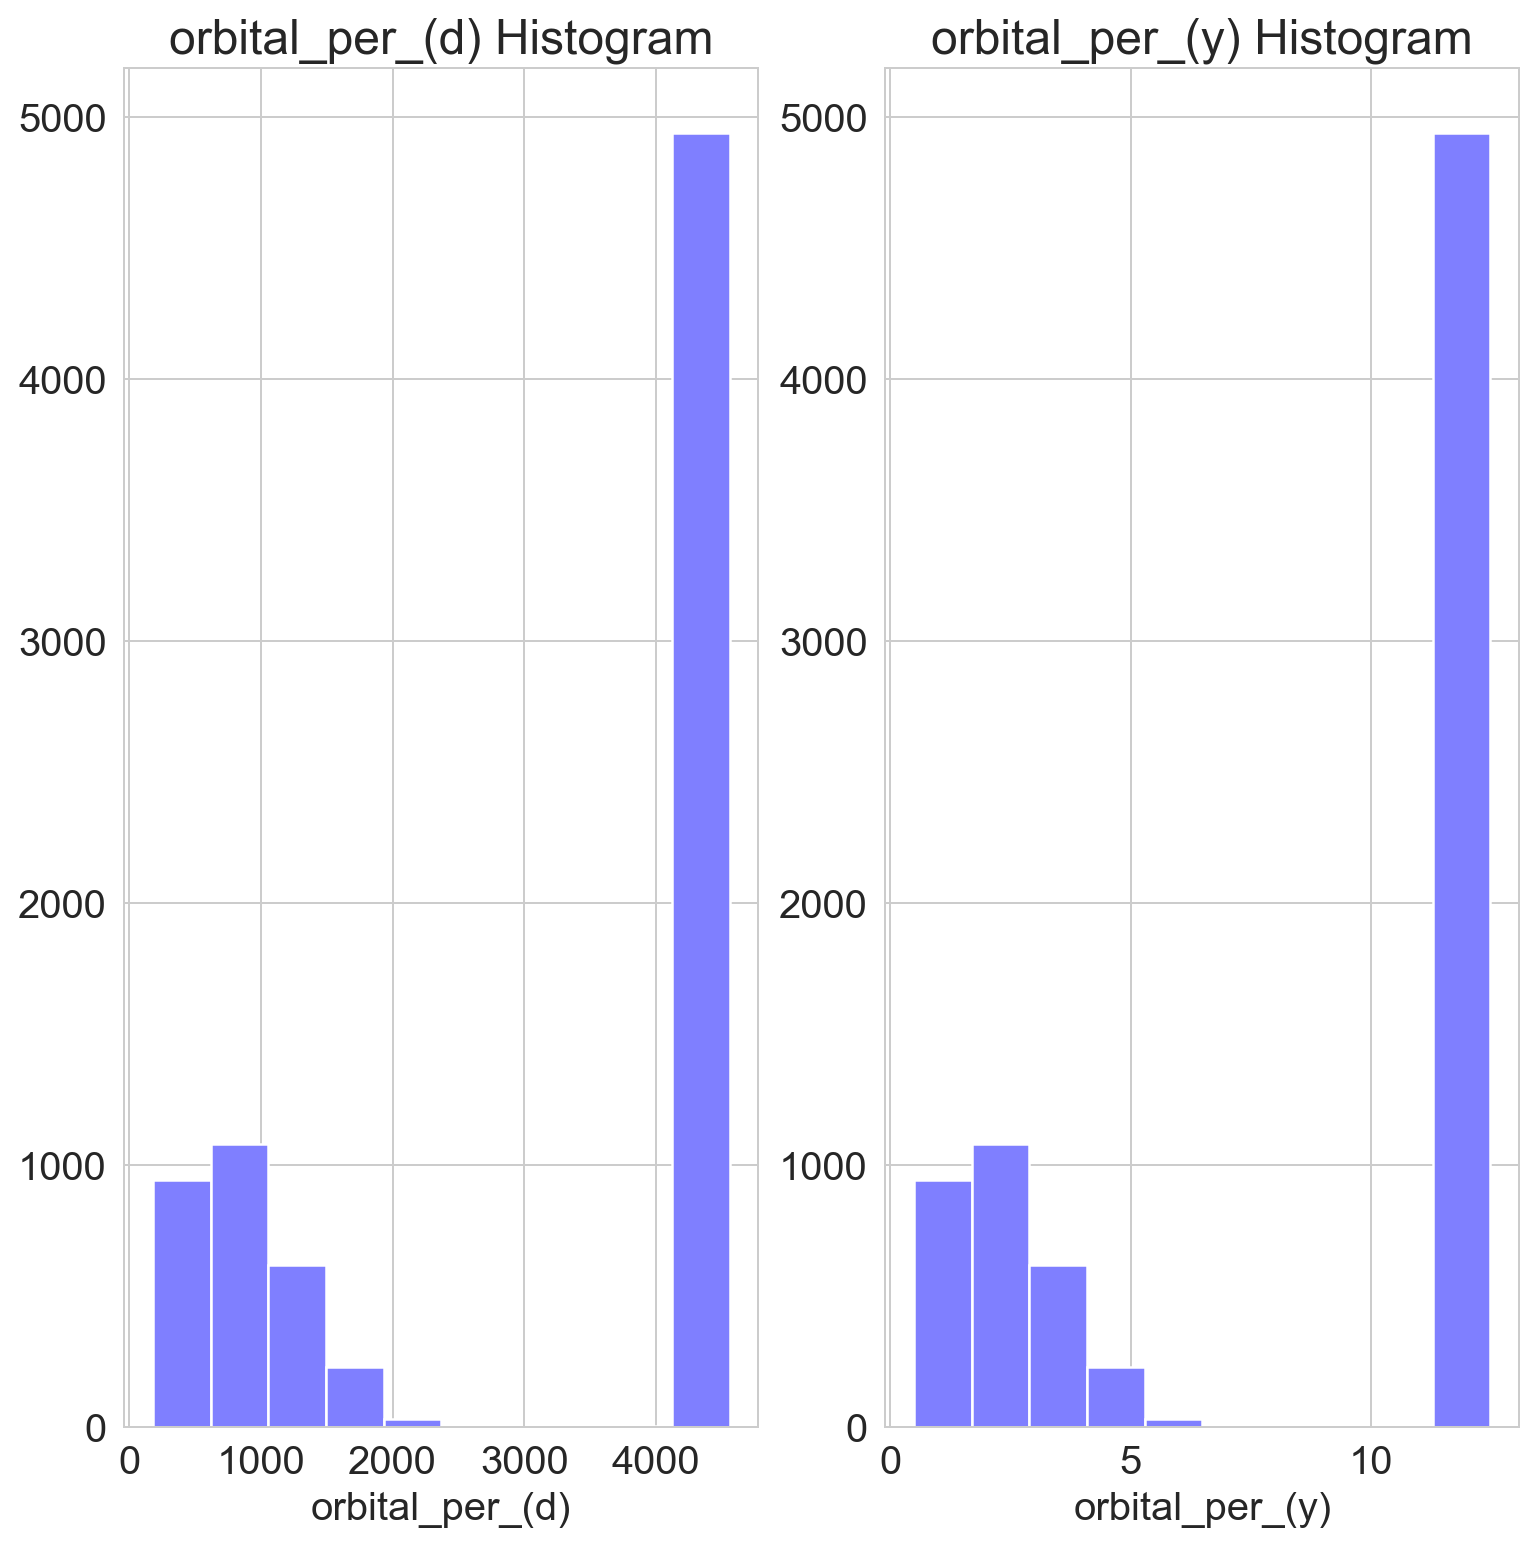

In [229]:
subplot_histograms(df,
                  ['orbital_per_(d)', 'orbital_per_(y)'],
                  ['orbital_per_(d)', 'orbital_per_(y)'],
                  ['orbital_per_(d)', 'orbital_per_(y)'])

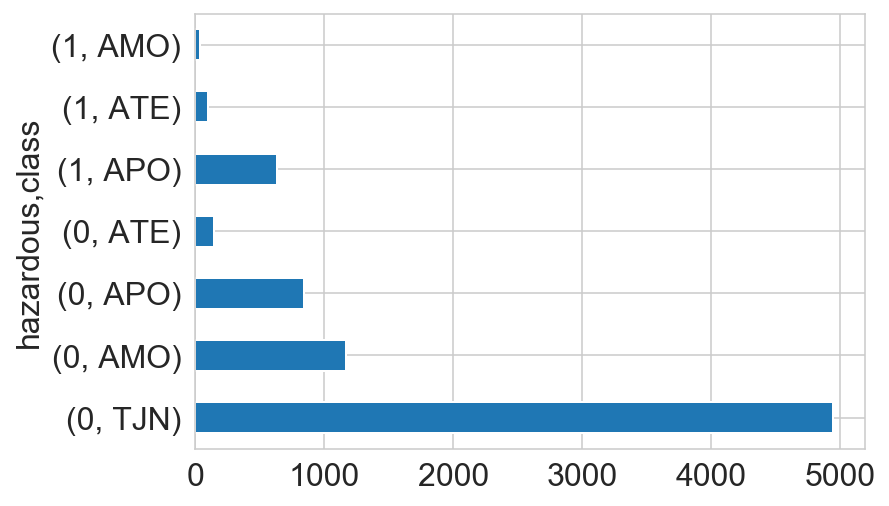

In [230]:
df.groupby('hazardous')['class'].value_counts().plot(kind='barh');

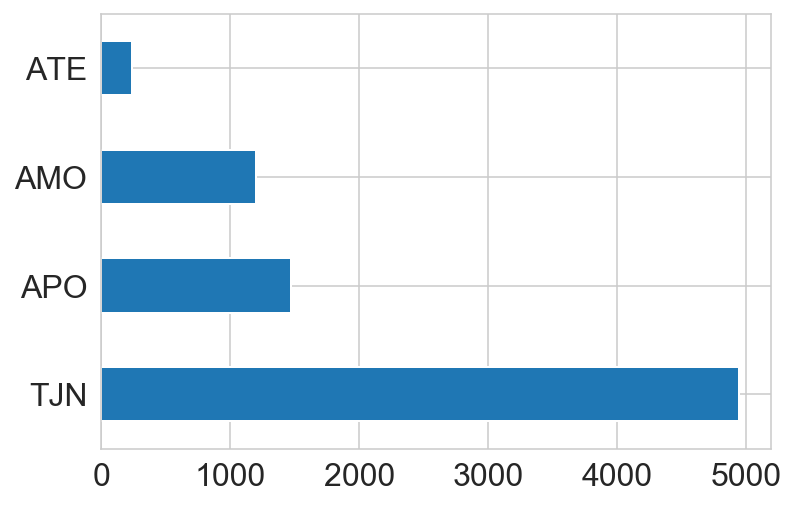

In [231]:
df.sort_values(by='hazardous')['class'].value_counts().plot(kind='barh');

In [232]:
def plot_scatterplot(dataframe, list_of_columns, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5), dpi=80)
    plt.scatter(dataframe[list_of_columns[0]],
            dataframe[list_of_columns[1]], c= '#7F7FFF')
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize=12);

In [233]:
# sns.pairplot(df);

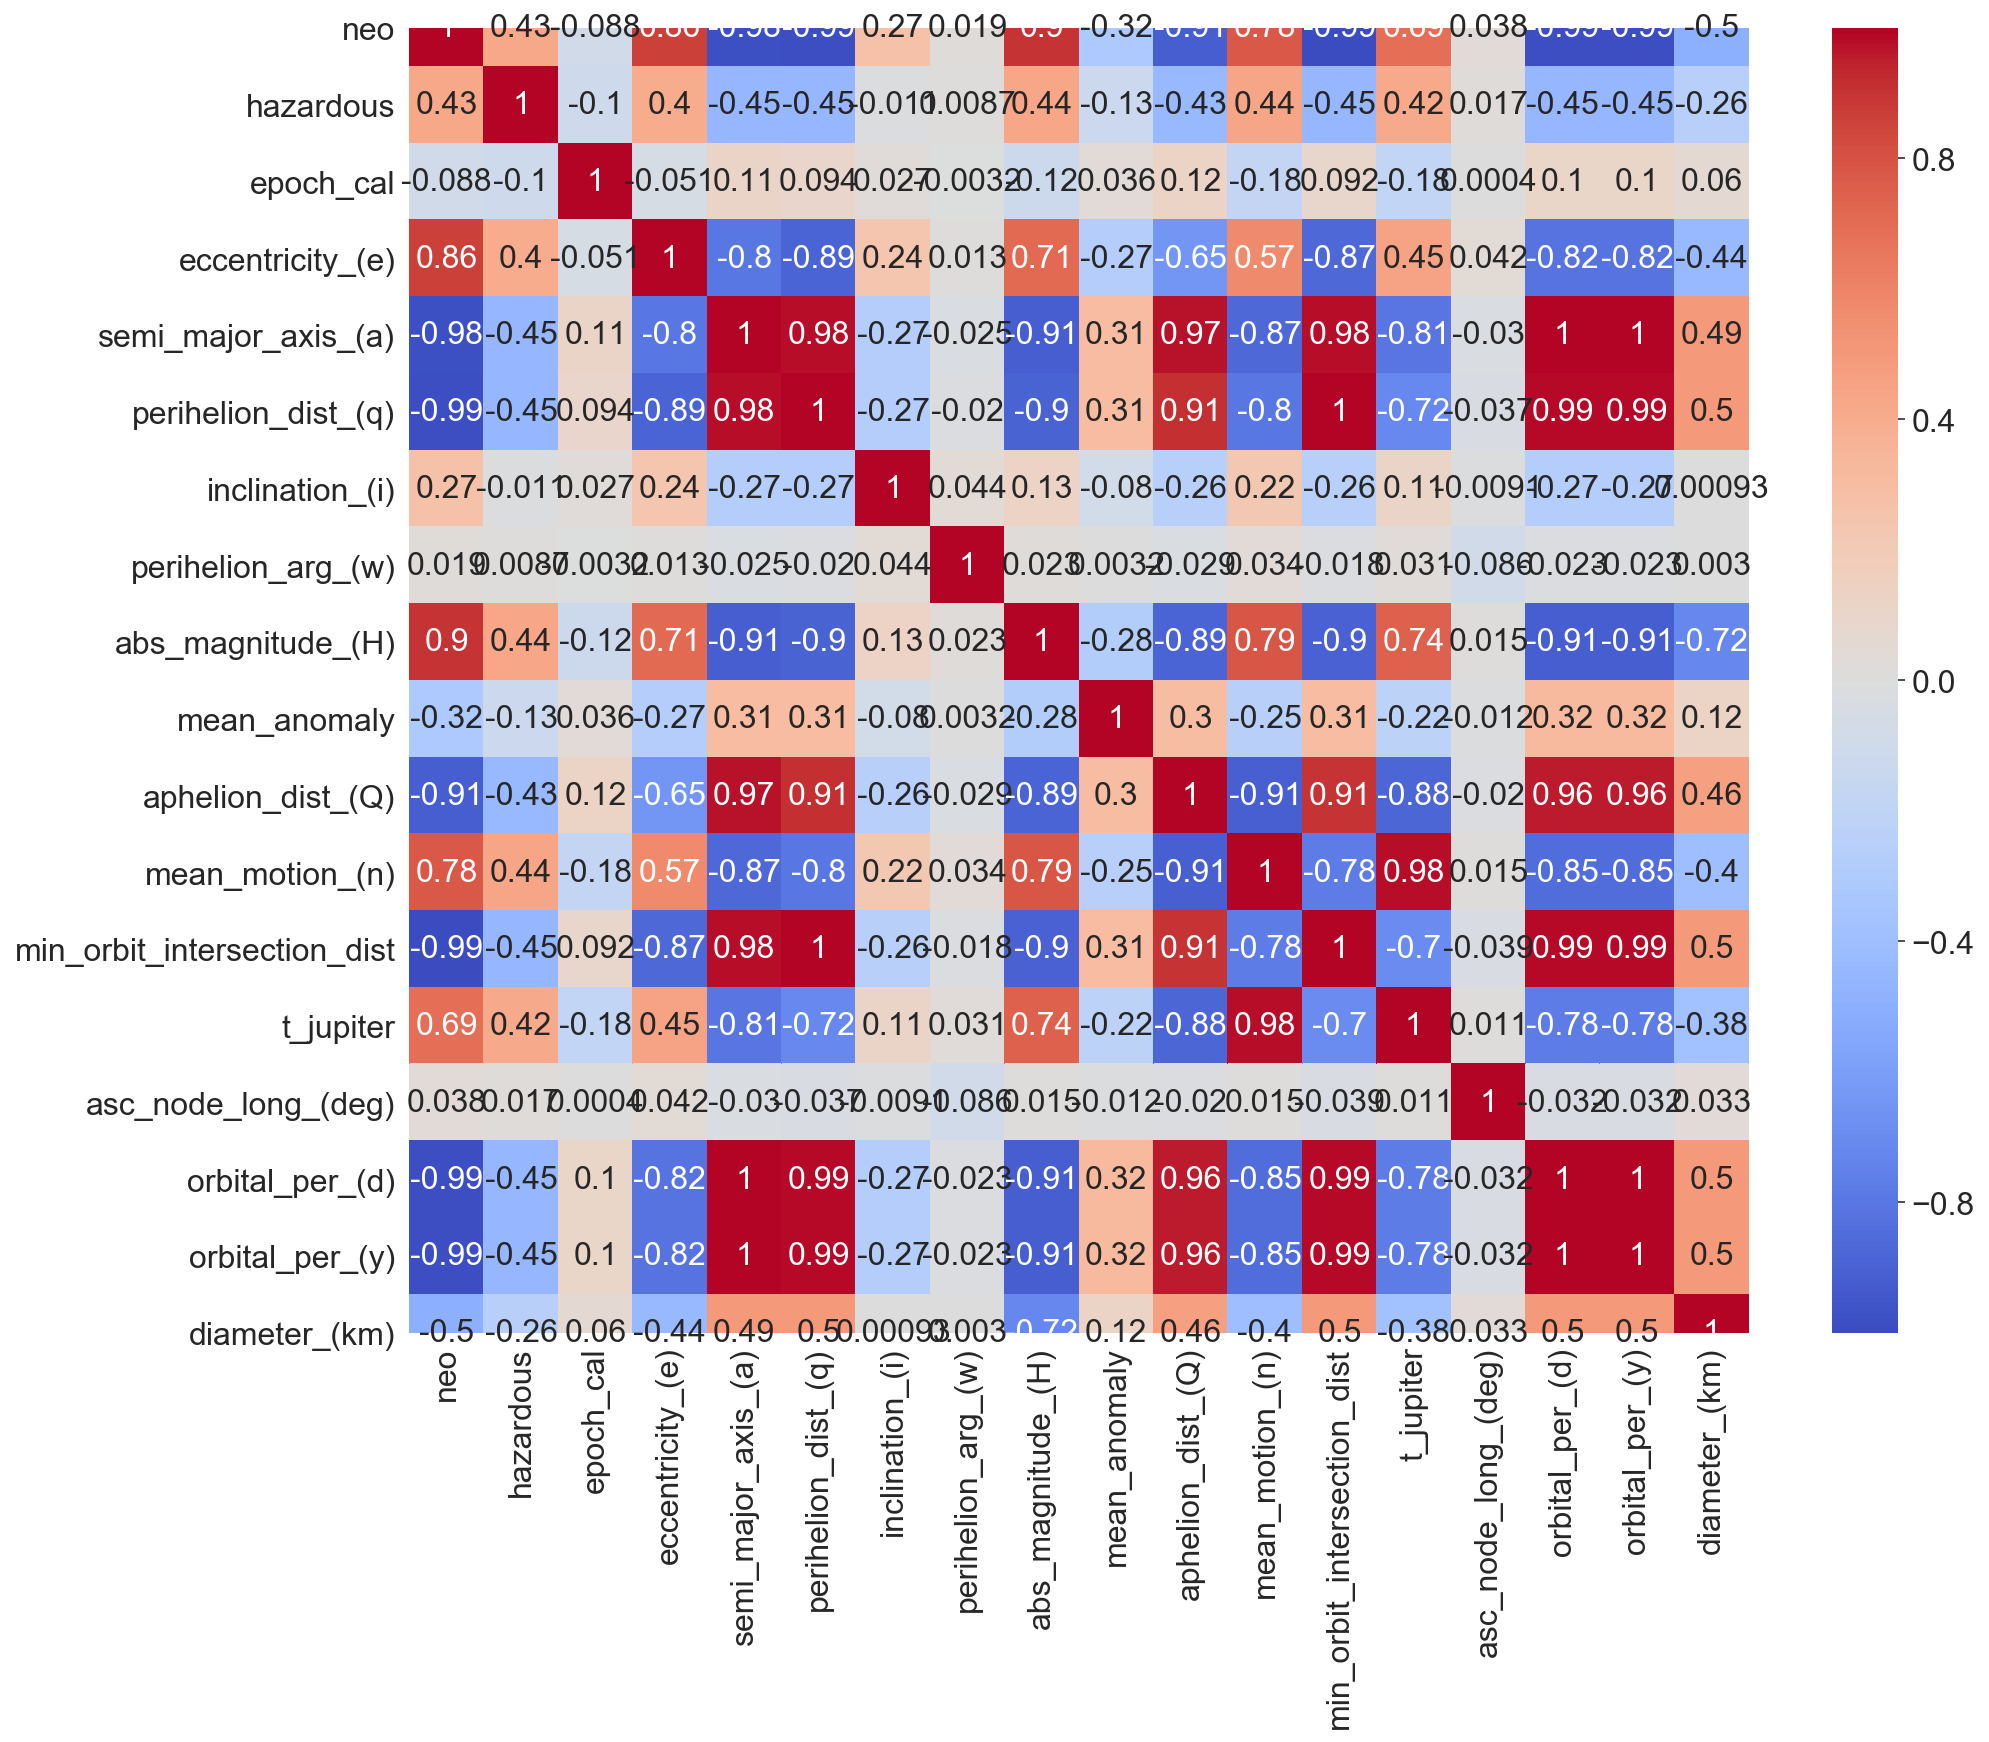

In [234]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

In [235]:
df.head()

,full_name,neo,hazardous,epoch_cal,eccentricity_(e),semi_major_axis_(a),perihelion_dist_(q),inclination_(i),perihelion_arg_(w),abs_magnitude_(H),...,mean_motion_(n),min_orbit_intersection_dist,t_jupiter,asc_node_long_(deg),orbital_per_(d),orbital_per_(y),class,first_obs,last_obs,diameter_(km)
0,433 Eros (1898 DQ),1,0,20200531.0,0.222951,1.458046,1.132973,10.830543,178.882294,10.4,...,0.559819,0.148623,4.582,304.299327,643.065402,1.760617,AMO,1893-10-29,2019-02-13,16.840
1,588 Achilles (1906 TG),0,0,20200531.0,0.147122,5.209394,4.442980,10.319724,133.308510,8.3,...,0.082894,3.470060,2.946,316.536049,4342.893776,11.890195,TJN,1906-02-22,2020-01-06,130.099
2,617 Patroclus (1906 VY),0,0,20200531.0,0.138967,5.214560,4.489910,22.051776,307.866082,8.2,...,0.082771,3.537570,2.836,44.348414,4349.355185,11.907886,TJN,1998-04-22,2019-08-17,140.362
3,624 Hektor (1907 XM),0,0,20200531.0,0.022797,5.262260,5.142298,18.157697,184.243883,7.2,...,0.081648,4.149850,2.899,342.791035,4409.170054,12.071650,TJN,1907-02-11,2020-01-26,225.000
4,659 Nestor (1908 CS),0,0,20200531.0,0.117448,5.164464,4.557910,4.522630,343.462149,8.7,...,0.083978,3.548340,2.980,350.739111,4286.830857,11.736703,TJN,1908-03-23,2020-01-06,112.320


In [236]:
# plt.figure(figsize=(12,8))
# plt.plot(df1)

In [237]:
# Make copy of df to set first observed as index
df1 = df.copy()
df1.set_index('first_obs', inplace=True)

# Make copy of df to set last observed as index
df2 = df.copy()
df2.set_index('last_obs', inplace=True)

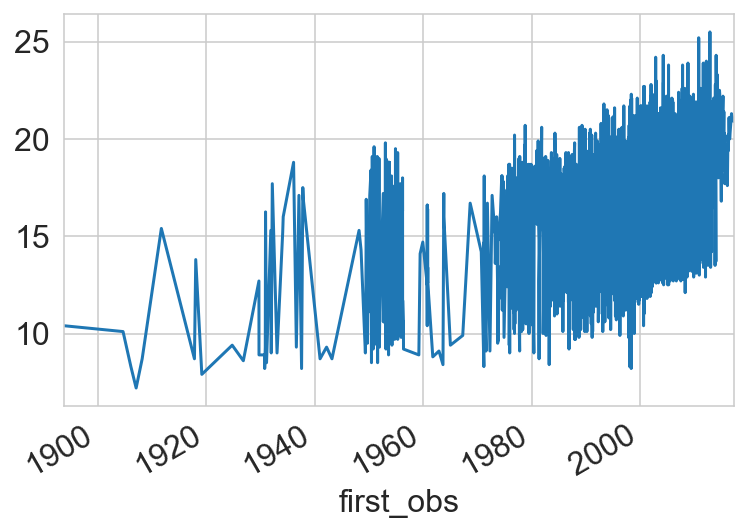

In [238]:
df1['abs_magnitude_(H)'].plot();

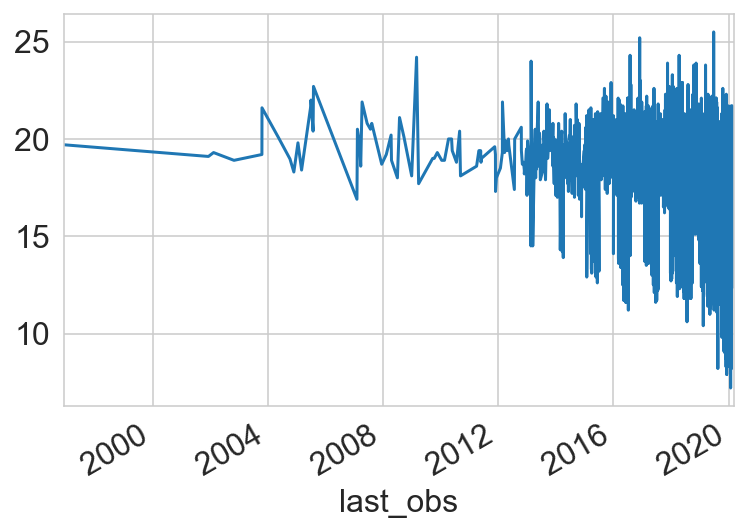

In [239]:
df2['abs_magnitude_(H)'].plot();

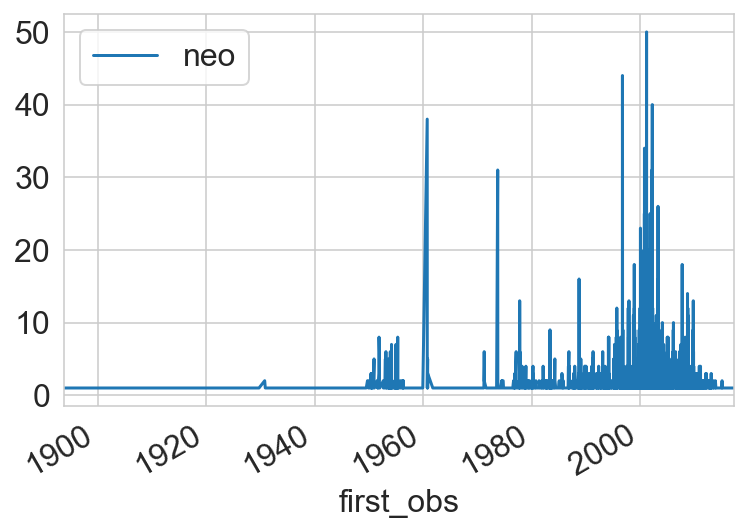

In [240]:
df.groupby('first_obs')[['neo']].count().plot();

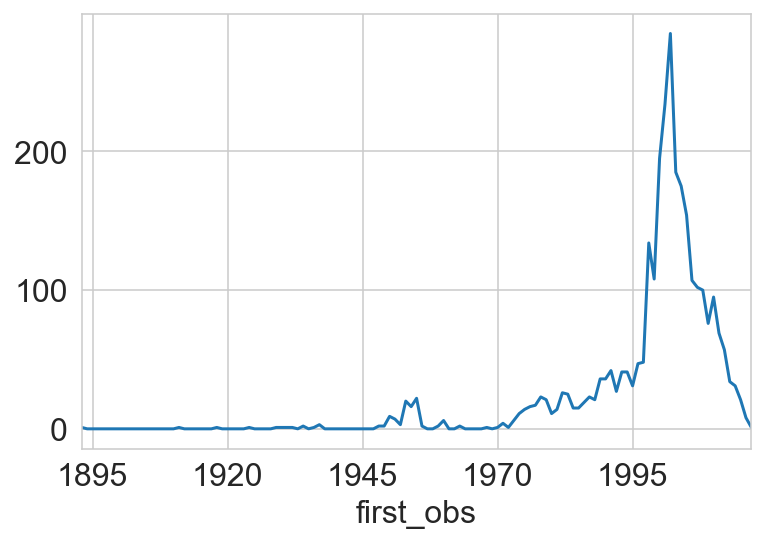

In [241]:
df1['neo'].resample('Y').sum().plot();

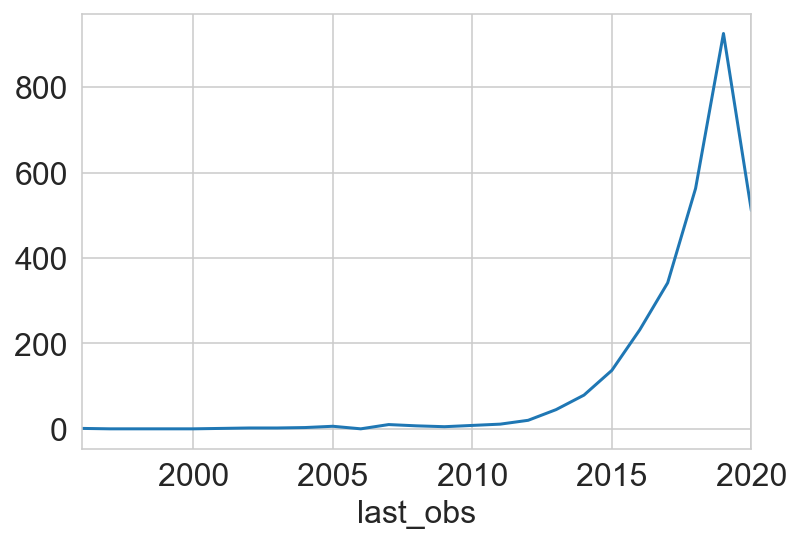

In [242]:
df2['neo'].resample('Y').sum().plot();

In [243]:
df1[['neo']].resample('Y').sum().describe()

,neo
count,125.000000
mean,23.288000
std,49.371177
min,0.000000
25%,0.000000
50%,1.000000
75%,21.000000
max,285.000000


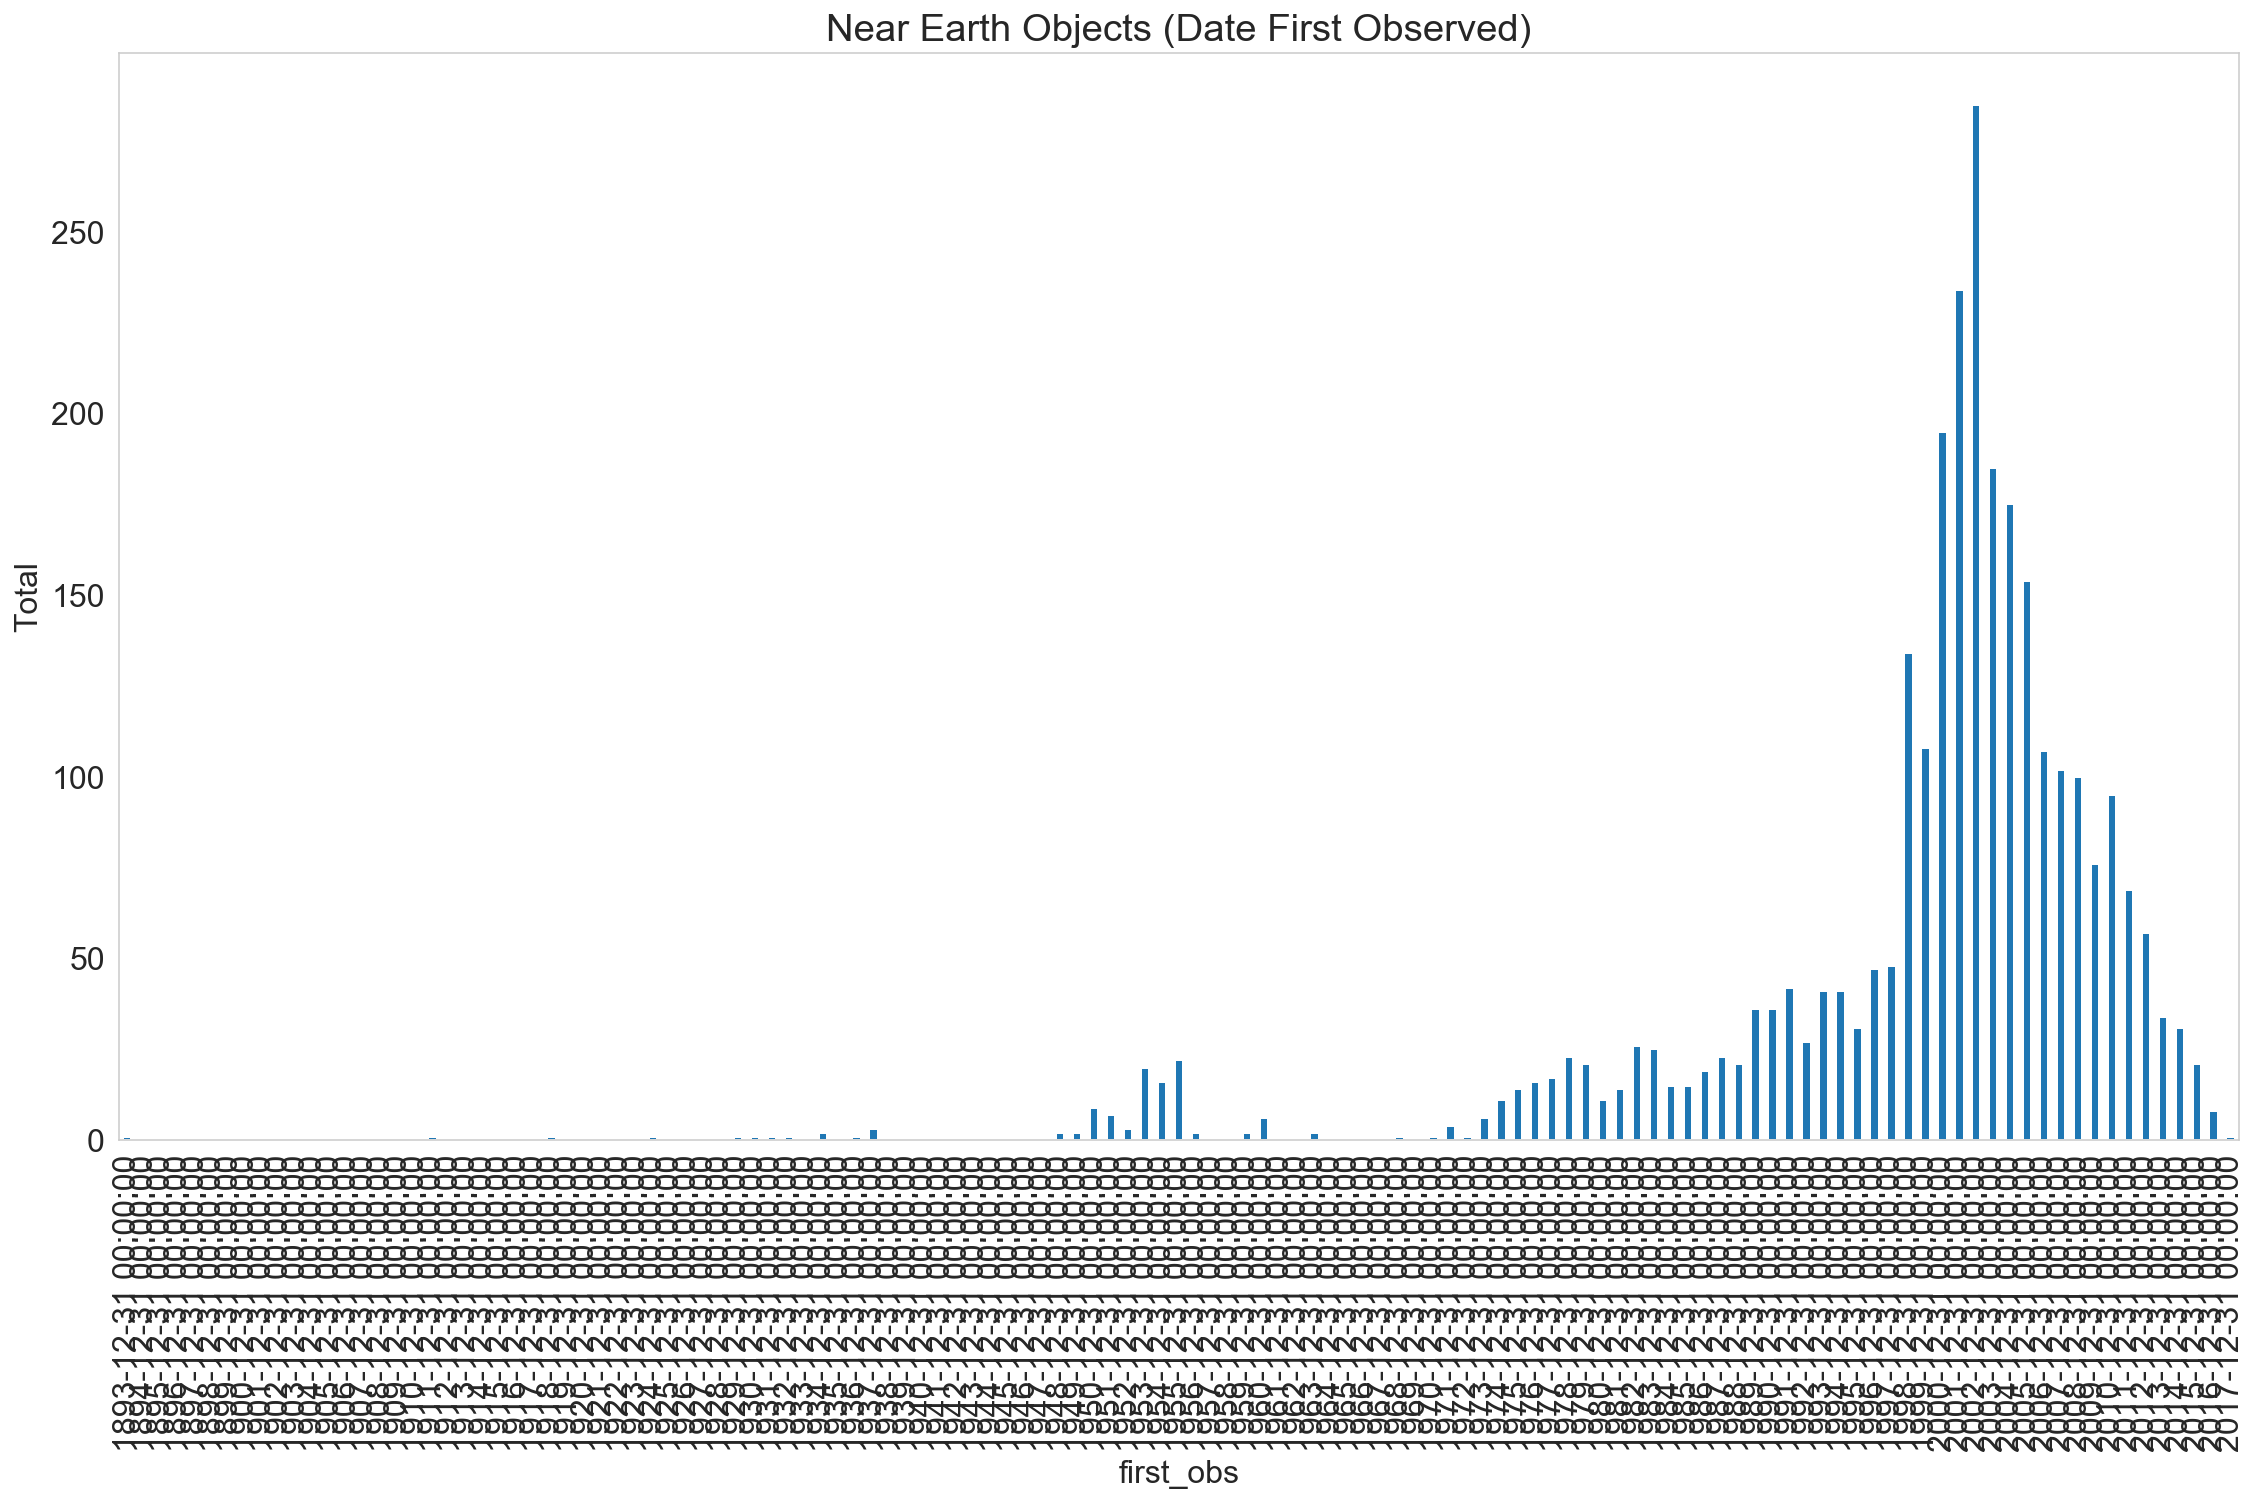

In [244]:
plt.figure(figsize=(19,10))
df1['neo'].resample('Y').sum().plot(kind='bar', grid=False)
plt.title('Near Earth Objects (Date First Observed)')
plt.ylabel('Total');

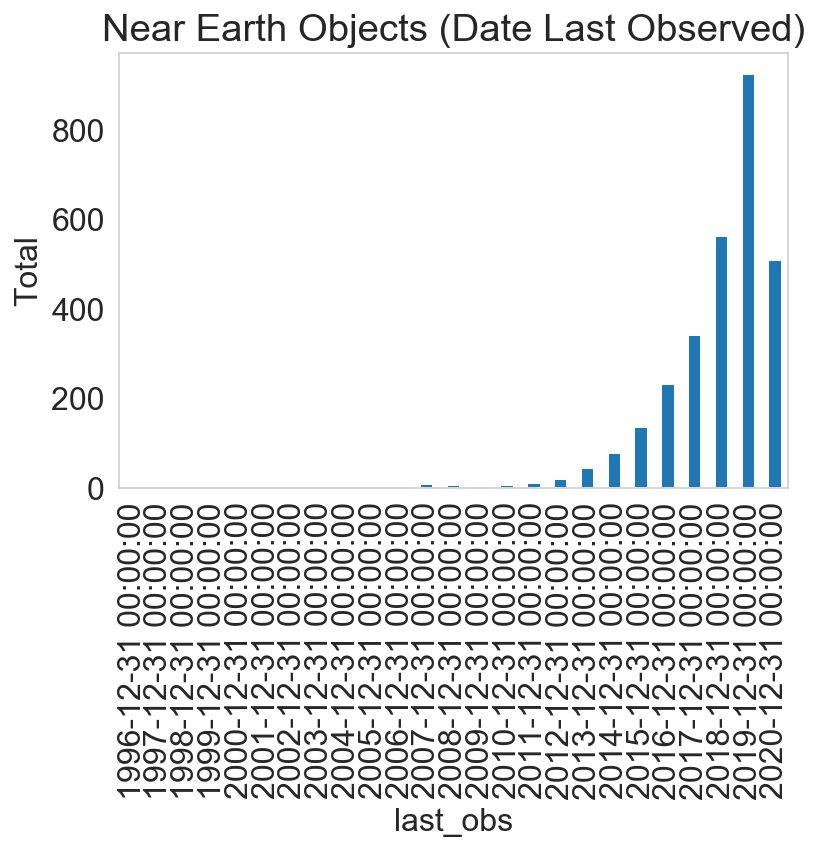

In [245]:
df2['neo'].resample('Y').sum().plot(kind='bar', grid=False)
plt.title('Near Earth Objects (Date Last Observed)')
plt.ylabel('Total');

In [246]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

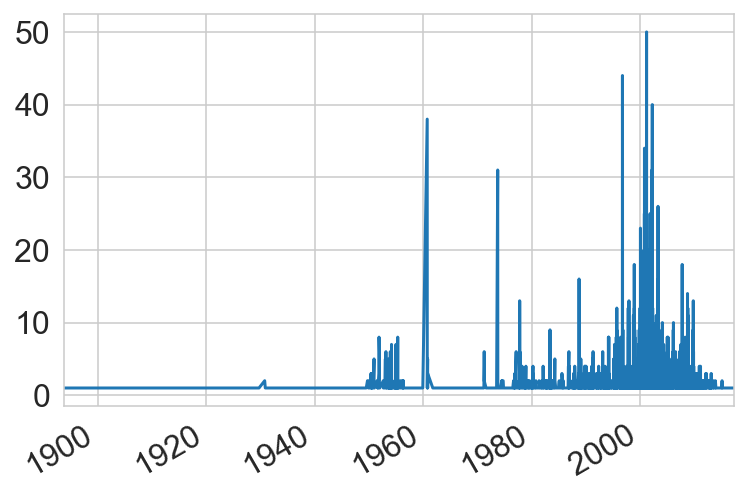

In [247]:
df.sort_values(by='hazardous')['first_obs'].value_counts().plot();

### Orbital Elements



![orbitalelements](../images/orbitalelements.png)
[source](http://www.columbia.edu/~my2317/asteroidproject.html)

In [ ]:
df.dtypes